In [2]:
import numpy as np
from gridworldv2 import GridworldV2Env
from value_function_utils import visualize_grid_state_values


In [8]:
def temporal_diff_learning():
    env = GridworldV2Env(max_ep_length=4000)
    grid_state_values = np.zeros((len(env.distinct_states), 1))
    grid_state_values[env.goal_state] = 1
    grid_state_values[env.bomb_state] = -1

    alpha = 0.99
    gamma = 0.01

    for ep in range(env.max_ep_length):
        env.reset()
        done = False

        while not done:
            state = env.state
            action = env.action_space.sample()
            next_state,reward,done = env.step(action)
            grid_state_values[state] += gamma*(reward + alpha*grid_state_values[next_state]-grid_state_values[state])

    visualize_grid_state_values(grid_state_values.reshape((3, 4)))



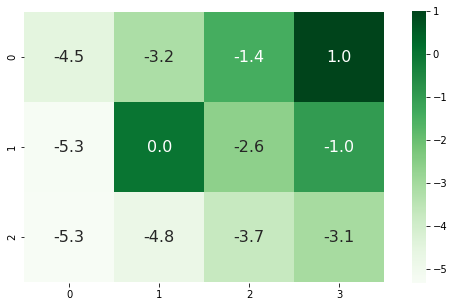

In [9]:
if __name__ == "__main__":
    temporal_diff_learning()